In [1]:
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt
import scipy
from scipy.signal import butter, filtfilt
from scipy import signal
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
file_names = ['prot1_Antoine_chute.csv','prot1_William_chute.csv','prot1_Antoine_maintient.csv','prot1_William_maintient.csv','prot1_Antoine_pics.csv','prot1_William_pics.csv','Tenue_01.csv','Tenue_02.csv']

In [142]:
# Créer un dictionnaire pour stocker les DataFrames correspondants aux fichiers
dataframes = {}#Le dictionnaire permet d'associer une valeur à un clé . Les dictionnaires sont souvent utilisés pour stocker et d'accéder à des données en utilisant une clé plutôt qu'un index numérique.

# Importer les fichiers et sélectionner les colonnes spécifiques
for file_name in file_names:
    #Lire à l'intérieur de file_name
    df = pd.read_csv(file_name)
    #Si le csv commence par prot1, sélectionner les colonnes Fz(N) et Time(s)
    if file_name.startswith('prot1'):
        df = df[['Fz (N)','Time (s)']]
    #Si le csv commence par Tenue
    elif file_name.startswith('Tenue'):
        #Sélectionner les colonnes AI7, AI8 correspondant et times
        df = df[['AI7 (V)', 'AI8 (V)','Time (s)']]
    dataframes[file_name] = df
    
# Trouver la longueur maximale parmi tous les DataFrames
max_length = max(df.shape[0] for df in dataframes.values())

#Créer une copie des valeurs du dictonnaire 
dfs = list(dataframes.values())
#Pour éviter l'erreur de changement de taille du dictionnaire
#pendant l'itération en cours

# Ajuster la longueur de chaque DataFrame en essayant d'éviter les NaN
for i, df in enumerate(dfs): # Avec enumerate, l'itérateur i représente l'index et df représente la valeur du dataframe dans dfs
    if df.shape[0] < max_length: #Vérifie si la longueur du DataFrame 'df' est inférieur à la longueur maximale        
        missing_rows = max_length - df.shape[0]# Calcule le nombre de lignes manquantes actuelles du dataframe en la longueure actuelle à la longueur maximale
        df = df.reindex(range(max_length)).ffill() #Réindexe le dataframe en utilisant des index allant de 0 à longueur max -1 en répétant les dernières valeurs connues
        dfs[i] = df #remplace le dataframe d'origine par le dataframe 
        dataframes[file_names[i]] = df #Met à jour le dictionnaire

# Concaténer les DataFrames alignés en un seul DataFrame
combined_df = pd.concat(dataframes.values(), axis=1)

# Afficher le DataFrame combiné
print(combined_df)




          Fz (N)  Time (s)    Fz (N)  Time (s)    Fz (N)  Time (s)    Fz (N)  \
0      -1.162098    0.0000  1.620987    0.0000 -1.145707     0.000 -1.665815   
1      -1.158411    0.0005  1.653298    0.0005 -1.132882     0.002 -1.659781   
2      -1.154502    0.0010  1.660769    0.0010 -1.177763     0.004 -1.616139   
3      -1.141572    0.0015  1.647473    0.0015 -1.170269     0.006 -1.636424   
4      -1.151772    0.0020  1.631354    0.0020 -1.099326     0.008 -1.651426   
...          ...       ...       ...       ...       ...       ...       ...   
128636  0.019316    4.6715  0.119734    3.5835 -1.480797   112.766 -0.879079   
128637  0.019316    4.6715  0.119734    3.5835 -1.480797   112.766 -0.879079   
128638  0.019316    4.6715  0.119734    3.5835 -1.480797   112.766 -0.879079   
128639  0.019316    4.6715  0.119734    3.5835 -1.480797   112.766 -0.879079   
128640  0.019316    4.6715  0.119734    3.5835 -1.480797   112.766 -0.879079   

        Time (s)    Fz (N)  Time (s)   

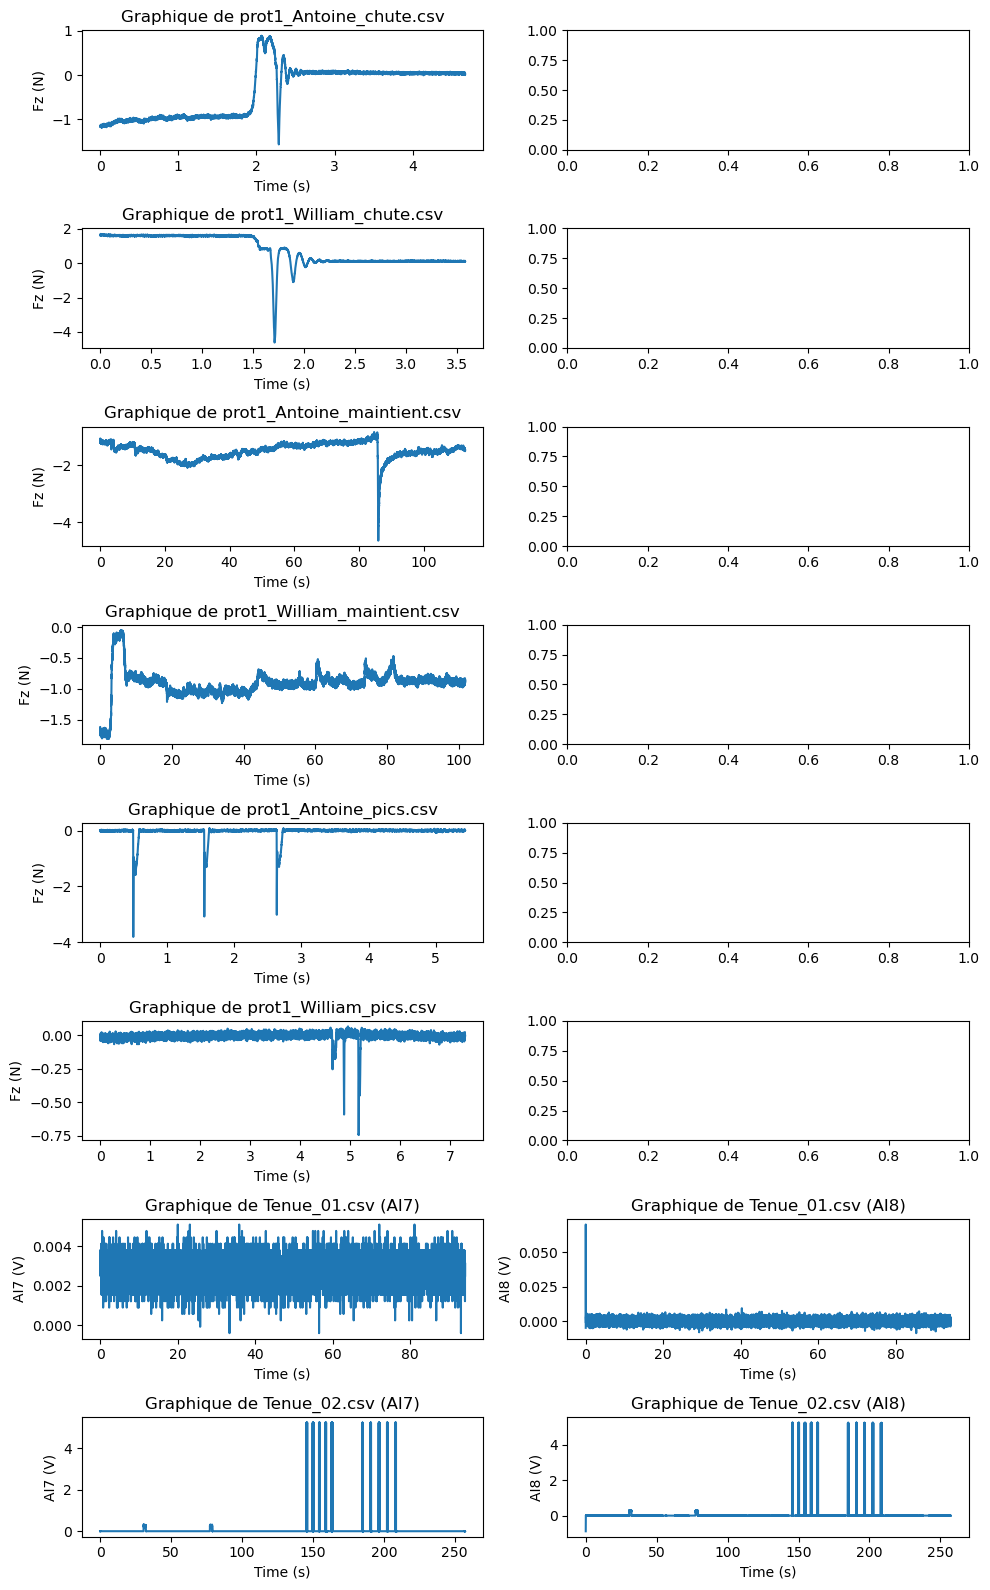

In [141]:
#Afficher les graphiques 
# Déterminer les dimensions de la grille de sous-graphiques
num_rows = len(file_names)
num_cols = 2

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2*num_rows))


# Afficher les graphiques des fichiers
#fig, axes = plt.subplots(len(file_names), figsize=(10, 2*len(file_names)))

for i, file_name in enumerate(file_names):
    df = dataframes[file_name]
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    
    if file_name.startswith('prot1'):
        x = df['Time (s)']
        y = df['Fz (N)']
        ax1.plot(x, y)
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Fz (N)')
        ax1.set_title(f'Graphique de {file_name}')
    elif file_name.startswith('Tenue'):
        x1 = df['Time (s)']
        y1 = df['AI7 (V)']
        ax1.plot(x1, y1)
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('AI7 (V)')
        ax1.set_title(f'Graphique de {file_name} (AI7)')
        
        x2 = df['Time (s)']
        y2 = df['AI8 (V)']
        ax2.plot(x2, y2)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('AI8 (V)')
        ax2.set_title(f'Graphique de {file_name} (AI8)')
        

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [82]:
#Rééchantillonner
#Pour appliquer le rééchantillonnage à chaque dataframe séparément 
Antoine_chute_df = Antoine_chute[['Fz (N)', 'Time (s)']]
William_chute_df = William_chute[['Fz (N)', 'Time (s)']]
Antoine_maintient_df = Antoine_maintient[['Fz (N)', 'Time (s)']]
William_maintient_df = William_maintient[['Fz (N)', 'Time (s)']]
Antoine_pics_df = Antoine_pics[['Fz (N)', 'Time (s)']]
William_pics_df = William_pics[['Fz (N)', 'Time (s)']]
Test_df = Test[['AI7 (V)', 'AI8 (V)', 'Time (s)']]
Test22_df = Test22[['AI7 (V)', 'AI8 (V)', 'Time (s)']]



# Convertir les colonnes de temps en index de type DatetimeIndex et utiliser .loc pour éviter les avertissements
Antoine_chute_df.loc[:, 'Time (s)'] = pd.to_datetime(Antoine_chute_df['Time (s)'], unit='s')#Converti la colonne time
#en objet de type datetime pour permettre la manipulation ensuite (rééchantillonner)
Antoine_chute_df = Antoine_chute_df.set_index('Time (s)')#Définir cette colonne comme nouvel index

William_chute_df.loc[:, 'Time (s)'] = pd.to_datetime(William_chute_df['Time (s)'], unit='s')
William_chute_df = William_chute_df.set_index('Time (s)')

Antoine_maintient_df.loc[:, 'Time (s)'] = pd.to_datetime(Antoine_maintient_df['Time (s)'], unit='s')
Antoine_maintient_df = Antoine_maintient_df.set_index('Time (s)')

William_maintient_df.loc[:, 'Time (s)'] = pd.to_datetime(William_maintient_df['Time (s)'], unit='s')
William_maintient_df = William_maintient_df.set_index('Time (s)')

Antoine_pics_df.loc[:, 'Time (s)'] = pd.to_datetime(Antoine_pics_df['Time (s)'], unit='s')
Antoine_pics_df = Antoine_pics_df.set_index('Time (s)')

William_pics_df.loc[:, 'Time (s)'] = pd.to_datetime(William_pics_df['Time (s)'], unit='s')
William_pics_df = William_pics_df.set_index('Time (s)')

Test_df.loc[:, 'Time (s)'] = pd.to_datetime(Test_df['Time (s)'], unit='s') 
Test_df = Test_df.set_index('Time (s)')

Test22_df.loc[:, 'Time (s)'] = pd.to_datetime(Test22_df['Time (s)'], unit='s')
Test22_df = Test22_df.set_index('Time (s)')

# Rééchantillonnage à 100 Hz pour chaque dataframe
Antoine_chute_resampled = Antoine_chute_df.resample('10ms').mean()
William_chute_resampled = William_chute_df.resample('10ms').mean()
Antoine_maintient_resampled = Antoine_maintient_df.resample('10ms').mean()
William_maintient_resampled = William_maintient_df.resample('10ms').mean()
Antoine_pics_resampled = Antoine_pics_df.resample('10ms').mean()
William_pics_resampled = William_pics_df.resample('10ms').mean()
Test_resampled = Test_df.resample('10ms').mean()
Test22_resampled = Test22_df.resample('10ms').mean()

print(Antoine_chute_resampled)
print(William_chute_resampled)
print(Antoine_maintient_resampled)
print(William_maintient_resampled)
print(William_pics_resampled)
print(Antoine_pics_resampled)
print(Test_resampled)
print(Test22_resampled)

                           Fz (N)
Time (s)                         
1970-01-01 00:00:00.000 -1.151196
1970-01-01 00:00:00.010 -1.154214
1970-01-01 00:00:00.020 -1.138666
1970-01-01 00:00:00.030 -1.140912
1970-01-01 00:00:00.040 -1.129895
...                           ...
1970-01-01 00:00:04.630  0.040603
1970-01-01 00:00:04.640  0.042287
1970-01-01 00:00:04.650  0.037963
1970-01-01 00:00:04.660  0.038909
1970-01-01 00:00:04.670  0.023716

[468 rows x 1 columns]
                           Fz (N)
Time (s)                         
1970-01-01 00:00:00.000  1.656236
1970-01-01 00:00:00.010  1.633026
1970-01-01 00:00:00.020  1.664047
1970-01-01 00:00:00.030  1.635129
1970-01-01 00:00:00.040  1.659498
...                           ...
1970-01-01 00:00:03.540  0.120029
1970-01-01 00:00:03.550  0.108692
1970-01-01 00:00:03.560  0.113406
1970-01-01 00:00:03.570  0.104055
1970-01-01 00:00:03.580  0.112839

[359 rows x 1 columns]
                           Fz (N)
Time (s)                         


/Applications/anaconda3/envs/aagrip23/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
/var/folders/qy/51jsnh892cv9dkw_278fxjn80000gn/T/ipykernel_69625/305340142.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Antoine_chute_df.loc[:, 'Time (s)'] = pd.to_datetime(Antoine_chute_df['Time (s)'], unit='s')#Converti la colonne time
/Applications/anaconda3/envs/aagrip23/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
/var/folders/qy/51jsnh892cv9dkw_278fxjn80000gn/T

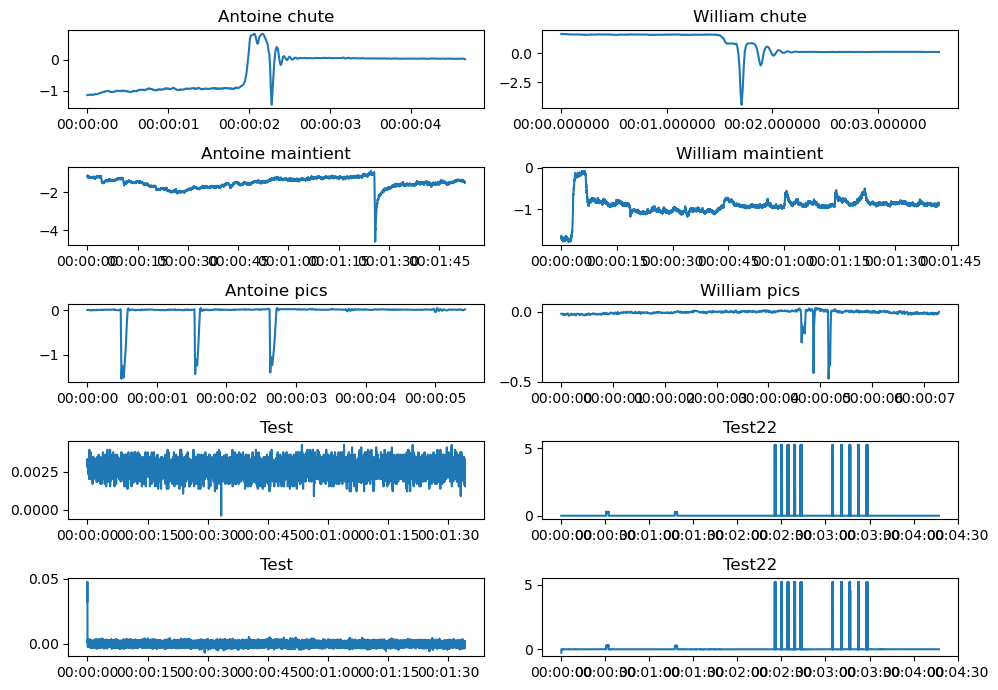

In [134]:
# Définir la figure et les sous-graphiques
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10, 7))

# Tracer les graphiques des signaux rééchantillonnés
axs[0,0].plot(Antoine_chute_resampled.index, Antoine_chute_resampled['Fz (N)'])
axs[0,0].set_title('Antoine chute ')

axs[0,1].plot(William_chute_resampled.index, William_chute_resampled['Fz (N)'])
axs[0,1].set_title('William chute')

axs[1,0].plot(Antoine_maintient_resampled.index, Antoine_maintient_resampled['Fz (N)'])
axs[1,0].set_title('Antoine maintient')

axs[1,1].plot(William_maintient_resampled.index, William_maintient_resampled['Fz (N)'])
axs[1,1].set_title('William maintient')

axs[2,0].plot(Antoine_pics_resampled.index, Antoine_pics_resampled['Fz (N)'])
axs[2,0].set_title('Antoine pics')

axs[2,1].plot(William_pics_resampled.index, William_pics_resampled['Fz (N)'])
axs[2,1].set_title('William pics')

axs[3,0].plot(Test_resampled.index, Test_resampled['AI7 (V)'])
axs[3,0].set_title('Test')

axs[3,1].plot(Test22_resampled.index, Test22_resampled['AI7 (V)'])
axs[3,1].set_title('Test22')

axs[4,0].plot(Test_resampled.index, Test_resampled['AI8 (V)'])
axs[4,0].set_title('Test')

axs[4,1].plot(Test22_resampled.index, Test22_resampled['AI8 (V)'])
axs[4,1].set_title('Test22')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [125]:
# Appliquer un filtre sur les données et afficher les graphiques des données filtrées
# Définir la fréquence de coupure en Hz
cutoff_frequency = 15

sampling_frequency = 100 #fréquence à laquelle des échantillons successifs sont prélevés pour représenter un signal, on réindique par sécurité continu sous forme numérique


# Calculer la fréquence de coupure normalisée
normalized_cutoff_frequency = cutoff_frequency / (0.5 * sampling_frequency)

# Définir l'ordre du filtre
order = 4

# Définition des paramètres du filtre
order = 4  # Ordre du filtre
cutoff = 15  # Fréquence de coupure en Hz
fs = 100  # Fréquence d'échantillonnage en Hz

# Calcul des coefficients du filtre Butterworth
nyquist = 0.5 * fs
normal_cutoff = cutoff / nyquist
b, a = butter(order, normal_cutoff, btype='low', analog=False)

# Application du filtre à chaque signal rééchantillonné
Antoine_chute_filtered = filtfilt(b, a, Antoine_chute_resampled['Fz (N)'])
William_chute_filtered = filtfilt(b, a, William_chute_resampled['Fz (N)'])
Antoine_maintient_filtered = filtfilt(b, a, Antoine_maintient_resampled['Fz (N)'])
William_maintient_filtered = filtfilt(b, a, William_maintient_resampled['Fz (N)'])
Antoine_pics_filtered = filtfilt(b, a, Antoine_pics_resampled['Fz (N)'])
William_pics_filtered = filtfilt(b, a, William_pics_resampled['Fz (N)'])
Test_filtered = filtfilt(b, a, Test_resampled['AI7 (V)'])
Test22_filtered = filtfilt(b, a, Test22_resampled['AI7 (V)'])
Test_filtered = filtfilt(b, a, Test_resampled['AI8 (V)'])
Test22_filtered = filtfilt(b, a, Test22_resampled['AI8 (V)'])


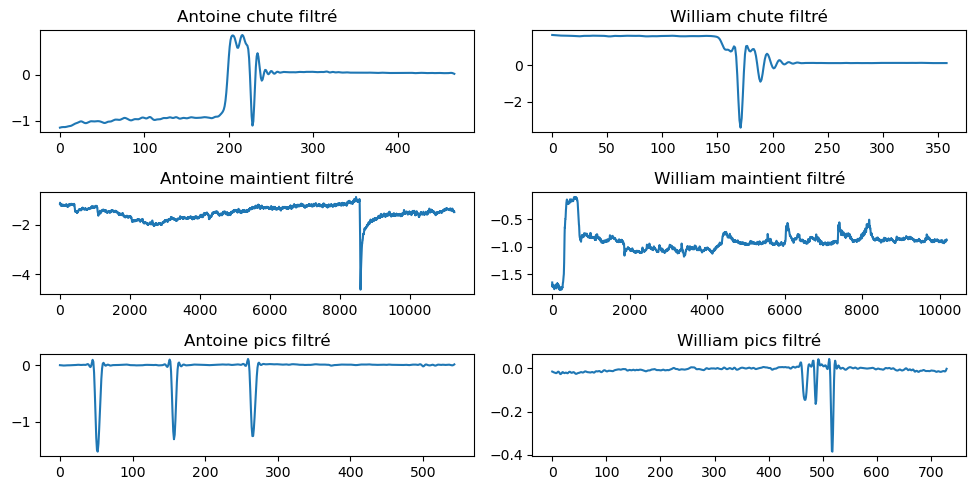

In [124]:
# Définir la figure et les sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 5))

# Tracer le graphique du signal rééchantillonné
axs[0,0].plot(Antoine_chute_filtered)
axs[0,0].set_title('Antoine chute filtré')

axs[0,1].plot(William_chute_filtered)
axs[0,1].set_title('William chute filtré')

axs[1,0].plot(Antoine_maintient_filtered)
axs[1,0].set_title('Antoine maintient filtré')

axs[1,1].plot(William_maintient_filtered)
axs[1,1].set_title('William maintient filtré')

axs[2,0].plot(Antoine_pics_filtered)
axs[2,0].set_title('Antoine pics filtré')

axs[2,1].plot(William_pics_filtered)
axs[2,1].set_title('William pics filtré')


plt.tight_layout()

# Afficher le graphique
plt.show()
